## Imoprt Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import tensorflow as tf
from keras.models import *
from keras.layers import *
from tensorflow.keras.optimizers import *
from keras.preprocessing.image import *

## Data Loading

In [2]:
data_dir=r"Data"
Action=[]
for file in os.listdir(data_dir):
    Action+=[file]
print(Action)
print(len(Action))

['calling', 'clapping', 'cycling', 'dancing', 'drinking', 'eating', 'fighting', 'hugging', 'laughing', 'listening_to_music', 'running', 'sitting', 'sleeping', 'texting', 'using_laptop']
15


## Data Preprocessing

In [3]:
img_height,img_width=224,224
batch_size=20

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
test_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation')

Found 8820 images belonging to 15 classes.
Found 3780 images belonging to 15 classes.


In [5]:
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()

In [6]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Applying CNN Algorithm

In [7]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(img_height,img_width, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(15, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 96)       0

In [8]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy",precision,recall])
hist=model.fit(train_generator,epochs=10,validation_data=test_generator,verbose=1)

Epoch 1/10
441/441 [==============================] - 421s 951ms/step - loss: 2.6510 - accuracy: 0.1094 - precision: 0.4079 - recall: 0.0035 - val_loss: 2.4429 - val_accuracy: 0.1757 - val_precision: 0.4872 - val_recall: 0.0050
Epoch 2/10
441/441 [==============================] - 390s 884ms/step - loss: 2.3010 - accuracy: 0.2514 - precision: 0.5747 - recall: 0.0288 - val_loss: 2.2158 - val_accuracy: 0.2807 - val_precision: 0.6556 - val_recall: 0.0312
Epoch 3/10
441/441 [==============================] - 391s 886ms/step - loss: 1.9036 - accuracy: 0.3872 - precision: 0.6581 - recall: 0.1401 - val_loss: 2.1638 - val_accuracy: 0.3114 - val_precision: 0.5663 - val_recall: 0.1040
Epoch 4/10
441/441 [==============================] - 397s 901ms/step - loss: 1.2934 - accuracy: 0.5765 - precision: 0.7599 - recall: 0.4016 - val_loss: 2.4034 - val_accuracy: 0.3106 - val_precision: 0.4295 - val_recall: 0.1992
Epoch 5/10
441/441 [==============================] - 423s 959ms/step - loss: 0.5007 - a

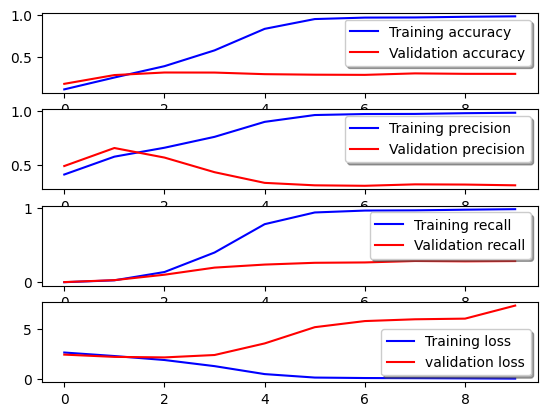

In [9]:
fig, ax = plt.subplots(4,1)
ax[0].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['precision'], color='b', label="Training precision")
ax[1].plot(hist.history['val_precision'], color='r',label="Validation precision",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

ax[2].plot(hist.history['recall'], color='b', label="Training recall")
ax[2].plot(hist.history['val_recall'], color='r',label="Validation recall",axes =ax[2])
legend = ax[2].legend(loc='best', shadow=True)

ax[3].plot(hist.history['loss'], color='b', label="Training loss")
ax[3].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[3])
legend = ax[3].legend(loc='best', shadow=True)

In [10]:
filenames = test_generator.filenames
nb_samples = len(filenames)
model_predict = model.predict_generator(test_generator,steps = nb_samples, verbose=2)

C:\Users\ymts0427\AppData\Local\Temp\ipykernel_15552\281958920.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  model_predict = model.predict_generator(test_generator,steps = nb_samples, verbose=2)


3780/3780 - 41s - 41s/epoch - 11ms/step


Confusion matrix, without normalization
[[24 10 40  7  7 15 21 10 17 14 19 25 17  8 18]
 [19 17 38 15  2 25 12  8 12 21 17 18 23  4 21]
 [19 11 28 12 12 20 18 10 19 26 20 25 13  6 13]
 [21  9 34 17  8 19 18 11 12 20  9 27 17 11 19]
 [23 10 31 15 13 17 15  7 17 22 14 13 14  9 32]
 [22 11 30 15 11 18 13  9 14 20 18 23 12 12 24]
 [17 11 33 10  8 18 14 11 17 18 21 26 18 14 16]
 [13  7 45 17 12 33 16  6 13 15 12 24 15  9 15]
 [26 16 26 15  8 17 16  7 22 20 14 16 13  9 27]
 [18  9 31 13 15 22 14 14 14 10 22 19 17  6 28]
 [22 13 23 19 16 11 17  9 12 27 19 28  9 10 17]
 [24 16 25 16  8 19 18 15 12 16 13 32 11  6 21]
 [20  5 38 20 10 11 17 16 11 23 17 25  9 14 16]
 [20 16 32 15  7 20 23 12 13 21 15 17 10 10 21]
 [18  7 37 14  6 23 20  9 10 23 11 20  9 19 26]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

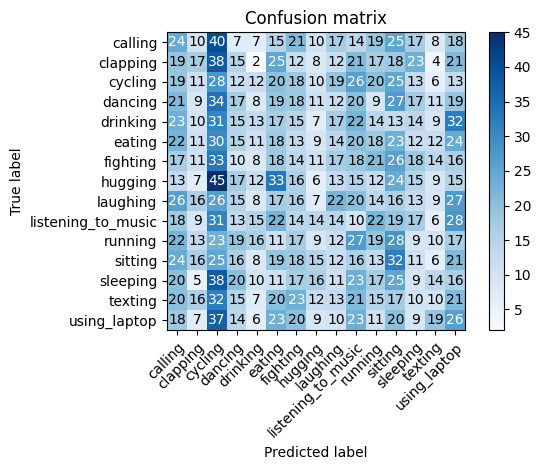

In [11]:
y_true = test_generator.classes
y_pred = model_predict.argmax(axis=1)
plot_confusion_matrix(y_true, y_pred, classes=['calling', 'clapping', 'cycling', 'dancing', 'drinking', 'eating', 'fighting', 'hugging', 'laughing', 'listening_to_music', 'running', 'sitting', 'sleeping', 'texting', 'using_laptop'],
                      title='Confusion matrix')

In [12]:
model.evaluate(test_generator)
# model.save("models/CNN.h5")

189/189 [==============================] - 40s 209ms/step - loss: 7.3289 - accuracy: 0.2950 - precision: 0.3071 - recall: 0.2870


[7.328894138336182,
 0.29497355222702026,
 0.3071044385433197,
 0.28703704476356506]

## Applying MobileNet Algorithm

In [13]:
base_model = tf.keras.applications.MobileNet(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model1 = Sequential()
model1.add(base_model)
model1.add(GlobalAveragePooling2D())
model1.add(Dense(64, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(15, activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 64)                65600     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                      

In [14]:
model1.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy",precision,recall])
hist1=model1.fit_generator(train_generator,epochs=10,validation_data=test_generator,verbose=1)

Epoch 1/10


C:\Users\ymts0427\AppData\Local\Temp\ipykernel_15552\806958967.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist1=model1.fit_generator(train_generator,epochs=10,validation_data=test_generator,verbose=1)


441/441 [==============================] - 934s 2s/step - loss: 1.5678 - accuracy: 0.5098 - precision: 0.1432 - recall: 0.7322 - val_loss: 1.6236 - val_accuracy: 0.5254 - val_precision: 0.1294 - val_recall: 0.9156
Epoch 2/10
441/441 [==============================] - 1008s 2s/step - loss: 1.0727 - accuracy: 0.6678 - precision: 0.1473 - recall: 0.9709 - val_loss: 1.9288 - val_accuracy: 0.4865 - val_precision: 0.1405 - val_recall: 0.8767
Epoch 3/10
441/441 [==============================] - 1007s 2s/step - loss: 0.8434 - accuracy: 0.7387 - precision: 0.1523 - recall: 0.9833 - val_loss: 1.6485 - val_accuracy: 0.5447 - val_precision: 0.1395 - val_recall: 0.9563
Epoch 4/10
441/441 [==============================] - 974s 2s/step - loss: 0.6532 - accuracy: 0.7940 - precision: 0.1555 - recall: 0.9907 - val_loss: 1.5286 - val_accuracy: 0.5825 - val_precision: 0.1380 - val_recall: 0.9431
Epoch 5/10
441/441 [==============================] - 1025s 2s/step - loss: 0.5262 - accuracy: 0.8356 - preci

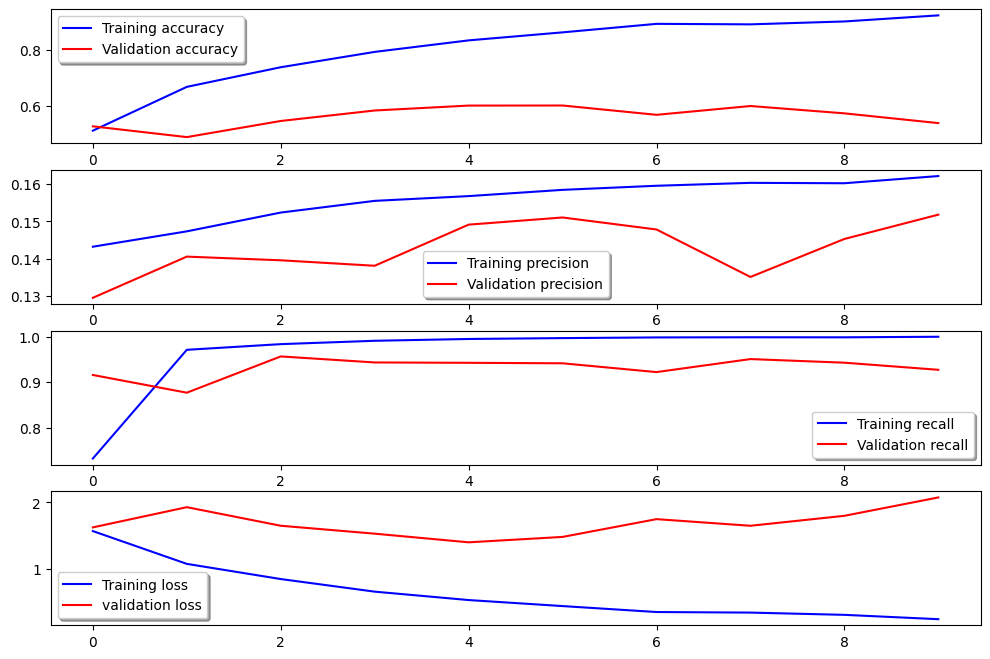

In [15]:
fig, ax = plt.subplots(4,1, figsize=(12,8))
ax[0].plot(hist1.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist1.history['precision'], color='b', label="Training precision")
ax[1].plot(hist1.history['val_precision'], color='r',label="Validation precision",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

ax[2].plot(hist1.history['recall'], color='b', label="Training recall")
ax[2].plot(hist1.history['val_recall'], color='r',label="Validation recall",axes =ax[2])
legend = ax[2].legend(loc='best', shadow=True)

ax[3].plot(hist1.history['loss'], color='b', label="Training loss")
ax[3].plot(hist1.history['val_loss'], color='r', label="validation loss",axes =ax[3])
legend = ax[3].legend(loc='best', shadow=True)

In [16]:
filenames = test_generator.filenames
nb_samples = len(filenames)
model1_predict = model1.predict_generator(test_generator,steps = nb_samples, verbose=2)

C:\Users\ymts0427\AppData\Local\Temp\ipykernel_15552\41881823.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  model1_predict = model1.predict_generator(test_generator,steps = nb_samples, verbose=2)


3780/3780 - 66s - 66s/epoch - 17ms/step


Confusion matrix, without normalization
[[13  9 16 13 31 13 21  5 11 58  8 23 21  8  2]
 [13  7 14 12 12 10 16  6 14 67 18 30 21 10  2]
 [14  4 21 10 18 11 18  8 11 70 16 21 20  9  1]
 [13 14  8  7 25 13 19  5  7 69 13 21 27  7  4]
 [11  7  9 10 28  7  9  7  6 77 11 30 30  9  1]
 [12  3 24 13 24 10 18  8 10 62 12 21 24  7  4]
 [11  2 14  6 21  8 22 13  6 77 16 23 22  6  5]
 [17  7 16  7 28 16 17  7  6 66 14 25 20  4  2]
 [12  5 13  9 24 12 15  7  9 76 12 27 24  4  3]
 [10  8 16 10 28 13 15  6  5 68 10 33 21  8  1]
 [15  3 13 11 19 14 17  9 11 58 18 22 28 12  2]
 [ 9  5 14 15 23 10 18  7  8 71 14 27 20  7  4]
 [12  6 16  2 21  4 17  7 10 80 10 31 25  6  5]
 [12  9 21  9 19 12 15  5 10 59 13 35 21  9  3]
 [ 7 11 16 13 16  9 17  6  5 68 20 36 23  3  2]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

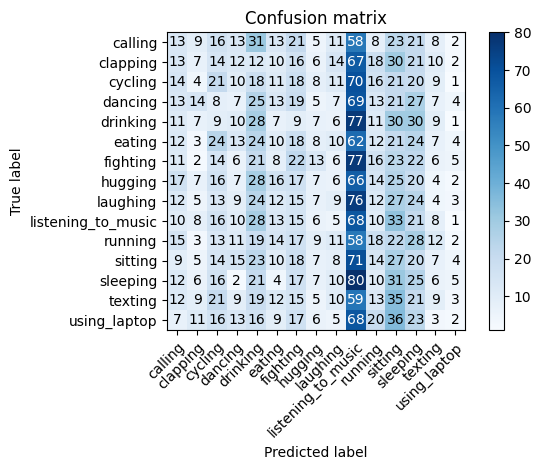

In [17]:
y_true = test_generator.classes
y_pred = model1_predict.argmax(axis=1)
plot_confusion_matrix(y_true, y_pred, classes=['calling', 'clapping', 'cycling', 'dancing', 'drinking', 'eating', 'fighting', 'hugging', 'laughing', 'listening_to_music', 'running', 'sitting', 'sleeping', 'texting', 'using_laptop'],
                      title='Confusion matrix')

In [18]:
model1.evaluate(test_generator)
# model1.save("models/MobileNet.h5")

189/189 [==============================] - 65s 342ms/step - loss: 2.0757 - accuracy: 0.5370 - precision: 0.1518 - recall: 0.9270


[2.0756852626800537,
 0.5370370149612427,
 0.15178687870502472,
 0.9269841313362122]

## Applying Nasnet Algorithm

In [19]:
base_model = tf.keras.applications.NASNetMobile(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model2 = Sequential()
model2.add(base_model)
model2.add(GlobalAveragePooling2D())
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(15, activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 global_average_pooling2d_1   (None, 1056)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 64)                67648     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 15)               

In [20]:
model2.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy",precision,recall])
hist2=model2.fit_generator(train_generator,epochs=10,validation_data=test_generator,verbose=1)

Epoch 1/10


C:\Users\ymts0427\AppData\Local\Temp\ipykernel_15552\1331075235.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist2=model2.fit_generator(train_generator,epochs=10,validation_data=test_generator,verbose=1)


441/441 [==============================] - 1510s 3s/step - loss: 1.6329 - accuracy: 0.5058 - precision: 0.1389 - recall: 0.9179 - val_loss: 3.2311 - val_accuracy: 0.1590 - val_precision: 0.0993 - val_recall: 0.6442
Epoch 2/10
441/441 [==============================] - 1598s 4s/step - loss: 1.0798 - accuracy: 0.6724 - precision: 0.1502 - recall: 0.9692 - val_loss: 3.6574 - val_accuracy: 0.0852 - val_precision: 0.0785 - val_recall: 0.5884
Epoch 3/10
441/441 [==============================] - 1538s 3s/step - loss: 0.8295 - accuracy: 0.7461 - precision: 0.1554 - recall: 0.9829 - val_loss: 17.6932 - val_accuracy: 0.0720 - val_precision: 0.0687 - val_recall: 0.4772
Epoch 4/10
441/441 [==============================] - 1527s 3s/step - loss: 0.6788 - accuracy: 0.7938 - precision: 0.1585 - recall: 0.9883 - val_loss: 11.5412 - val_accuracy: 0.0595 - val_precision: 0.0705 - val_recall: 0.4344
Epoch 5/10
441/441 [==============================] - 1564s 4s/step - loss: 0.5719 - accuracy: 0.8251 - p

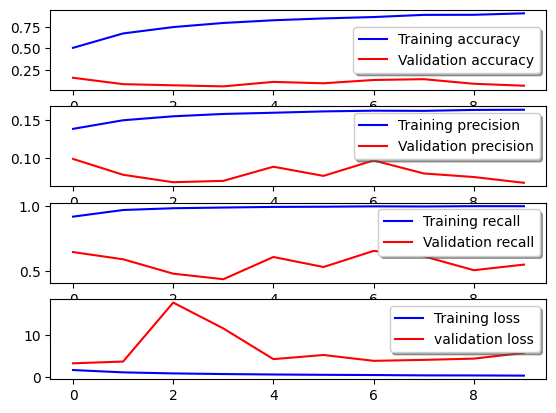

In [21]:
fig, ax = plt.subplots(4,1)
ax[0].plot(hist2.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist2.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist2.history['precision'], color='b', label="Training precision")
ax[1].plot(hist2.history['val_precision'], color='r',label="Validation precision",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

ax[2].plot(hist2.history['recall'], color='b', label="Training recall")
ax[2].plot(hist2.history['val_recall'], color='r',label="Validation recall",axes =ax[2])
legend = ax[2].legend(loc='best', shadow=True)

ax[3].plot(hist2.history['loss'], color='b', label="Training loss")
ax[3].plot(hist2.history['val_loss'], color='r', label="validation loss",axes =ax[3])
legend = ax[3].legend(loc='best', shadow=True)

In [22]:
filenames = test_generator.filenames
nb_samples = len(filenames)
model2_predict = model2.predict_generator(test_generator,steps = nb_samples, verbose=2)

C:\Users\ymts0427\AppData\Local\Temp\ipykernel_15552\723852190.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  model2_predict = model2.predict_generator(test_generator,steps = nb_samples, verbose=2)


3780/3780 - 124s - 124s/epoch - 33ms/step


Confusion matrix, without normalization
[[  0 247   0   0   0   0   0   0   0   0   0   0   0   3   2]
 [  0 249   0   0   0   0   0   0   0   0   0   0   0   1   2]
 [  0 249   0   0   0   0   0   0   0   0   0   0   0   2   1]
 [  0 245   0   0   0   0   0   0   0   0   0   3   0   2   2]
 [  0 250   0   0   0   0   0   0   0   0   0   0   0   0   2]
 [  0 250   0   0   0   0   0   0   0   0   0   0   0   0   2]
 [  0 250   0   0   0   0   0   0   0   0   0   1   0   1   0]
 [  0 247   0   0   0   0   0   0   0   0   0   1   0   2   2]
 [  0 252   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 250   0   0   0   0   0   0   0   0   0   0   0   1   1]
 [  0 250   0   0   0   0   0   0   0   0   0   0   0   2   0]
 [  0 251   0   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0 250   0   0   0   0   0   0   0   0   0   0   0   0   2]
 [  0 250   0   0   0   0   0   0   0   0   0   0   0   2   0]
 [  0 252   0   0   0   0   0   0   0   0   0   0   0   0   0]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

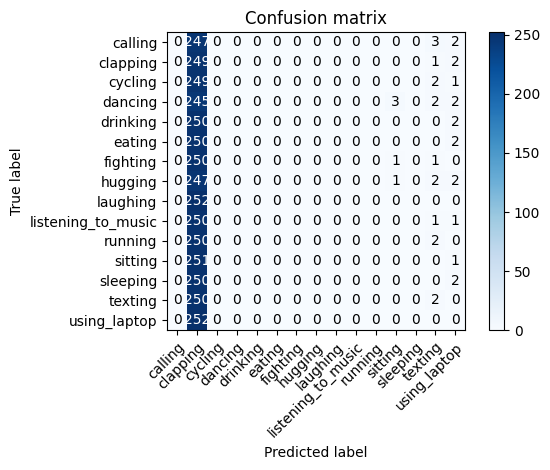

In [23]:
y_true = test_generator.classes
y_pred = model2_predict.argmax(axis=1)
plot_confusion_matrix(y_true, y_pred, classes=['calling', 'clapping', 'cycling', 'dancing', 'drinking', 'eating', 'fighting', 'hugging', 'laughing', 'listening_to_music', 'running', 'sitting', 'sleeping', 'texting', 'using_laptop'],
                      title='Confusion matrix')

In [24]:
model2.evaluate(test_generator)
# model2.save("models/Nasnet.h5")

189/189 [==============================] - 119s 630ms/step - loss: 5.7201 - accuracy: 0.0672 - precision: 0.0680 - recall: 0.5474


[5.720066070556641,
 0.06719576567411423,
 0.06796307861804962,
 0.547354519367218]

## Applying Convnext Algorithm

In [25]:
base_model = tf.keras.applications.ConvNeXtSmall(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model3 = Sequential()
model3.add(base_model)
model3.add(GlobalAveragePooling2D())
model3.add(Dense(64, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(15, activation='sigmoid'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnext_small (Functional)  (None, 7, 7, 768)        49454688  
                                                                 
 global_average_pooling2d_2   (None, 768)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 64)                49216     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 15)               

In [26]:
model3.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy",precision,recall])
hist3=model3.fit_generator(train_generator,epochs=5,validation_data=test_generator,verbose=1)

Epoch 1/5


C:\Users\ymts0427\AppData\Local\Temp\ipykernel_15552\3696945911.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist3=model3.fit_generator(train_generator,epochs=5,validation_data=test_generator,verbose=1)


441/441 [==============================] - 34531s 78s/step - loss: 2.7063 - accuracy: 0.0802 - precision: 0.0686 - recall: 0.4992 - val_loss: 116.6378 - val_accuracy: 0.0667 - val_precision: 0.0667 - val_recall: 0.4667
Epoch 2/5
441/441 [==============================] - 35436s 80s/step - loss: 2.7070 - accuracy: 0.0703 - precision: 0.0670 - recall: 0.4625 - val_loss: 124.2621 - val_accuracy: 0.0667 - val_precision: 0.0667 - val_recall: 0.7333
Epoch 3/5
441/441 [==============================] - 35519s 81s/step - loss: 2.7080 - accuracy: 0.0686 - precision: 0.0669 - recall: 0.5003 - val_loss: 39.4015 - val_accuracy: 0.0667 - val_precision: 0.0667 - val_recall: 0.3333
Epoch 4/5
441/441 [==============================] - 34704s 79s/step - loss: 2.7076 - accuracy: 0.0680 - precision: 0.0666 - recall: 0.4659 - val_loss: 213.1093 - val_accuracy: 0.0667 - val_precision: 0.0667 - val_recall: 0.4667
Epoch 5/5
441/441 [==============================] - 36745s 83s/step - loss: 2.7090 - accuracy:

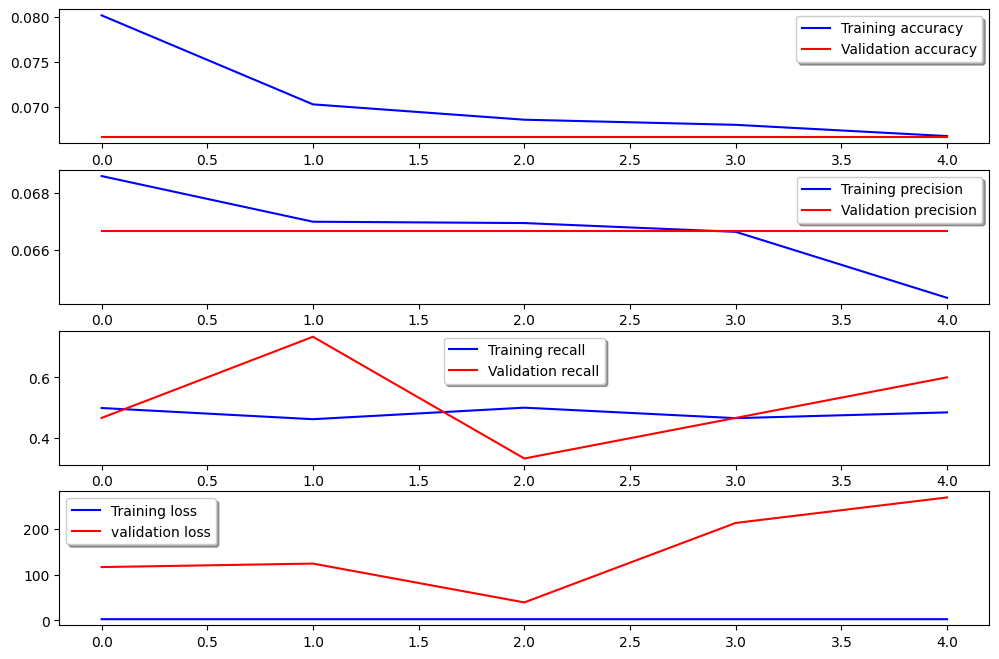

In [27]:
fig, ax = plt.subplots(4,1, figsize=(12,8))
ax[0].plot(hist3.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist3.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist3.history['precision'], color='b', label="Training precision")
ax[1].plot(hist3.history['val_precision'], color='r',label="Validation precision",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

ax[2].plot(hist3.history['recall'], color='b', label="Training recall")
ax[2].plot(hist3.history['val_recall'], color='r',label="Validation recall",axes =ax[2])
legend = ax[2].legend(loc='best', shadow=True)

ax[3].plot(hist3.history['loss'], color='b', label="Training loss")
ax[3].plot(hist3.history['val_loss'], color='r', label="validation loss",axes =ax[3])
legend = ax[3].legend(loc='best', shadow=True)

In [28]:
filenames = test_generator.filenames
nb_samples = len(filenames)
model3_predict = model3.predict_generator(test_generator,steps = nb_samples, verbose=2)

C:\Users\ymts0427\AppData\Local\Temp\ipykernel_15552\4282530451.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  model3_predict = model3.predict_generator(test_generator,steps = nb_samples, verbose=2)


3780/3780 - 4924s - 4924s/epoch - 1s/step


Confusion matrix, without normalization
[[252   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [252   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [252   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [252   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [252   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [252   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [252   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [252   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [252   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [252   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [252   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [252   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [252   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [252   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [252   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

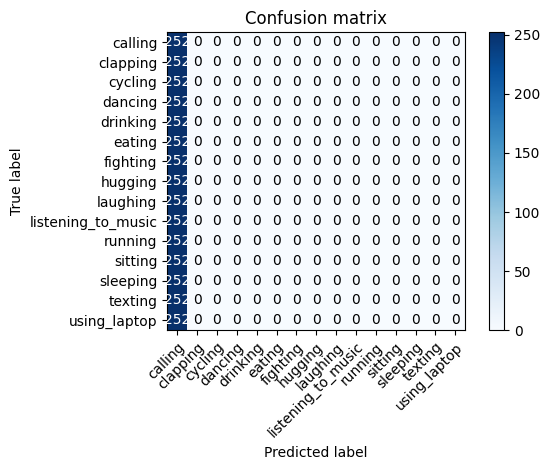

In [29]:
y_true = test_generator.classes
y_pred = model3_predict.argmax(axis=1)
plot_confusion_matrix(y_true, y_pred, classes=['calling', 'clapping', 'cycling', 'dancing', 'drinking', 'eating', 'fighting', 'hugging', 'laughing', 'listening_to_music', 'running', 'sitting', 'sleeping', 'texting', 'using_laptop'],
                      title='Confusion matrix')

In [30]:
model3.evaluate(test_generator)
model3.save("models/Convnext.h5")

189/189 [==============================] - 4900s 26s/step - loss: 268.8254 - accuracy: 0.0667 - precision: 0.0667 - recall: 0.6000


## Caculate the Accurarcy

In [31]:
Accuracy = []

for i in [hist, hist1,hist2,hist3]:
    x = i.history.get('accuracy')[-1]
    Accuracy.append(x)

Accuracy

[0.983900249004364,
 0.9258503317832947,
 0.9053288102149963,
 0.06678004562854767]

## Classification Output

1/1 [==============================] - 0s 444ms/step
[1.69077649e-16 6.23384482e-13 6.13623907e-09 4.59932220e-16
 1.00000000e+00 4.78649672e-13 1.19815225e-11 4.04369871e-11
 1.50233461e-08 4.26682561e-12 5.16966945e-19 7.04646619e-11
 3.12800289e-14 1.87993559e-14 2.47662012e-11]


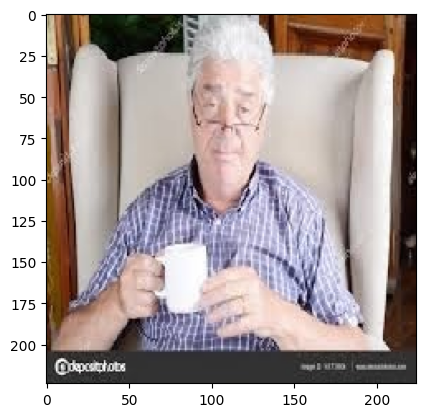

Prediction: drinking


In [36]:
from skimage import io
from tensorflow.keras.preprocessing import image

img = image.load_img(r'Data\drinking\Image_7.jpg', grayscale=False, target_size=(224,224))
show_img=image.load_img(r'Data\drinking\Image_7.jpg', grayscale=False, target_size=(224, 224))
Action = Action
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
print(custom[0])


plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',Action[ind])